1  **Introduction**

This case study is taken as Capstone Project for Google Data Analytics Professional Certificate. 

Cyclistic is a bicycle-share company based in Chicago, USA. They started a startup in 2016 to provide cycles on rent for people ease and daily use , now it has become a company. Since then, the startup has grown to a fleet of 5,800icycles that are geotracked and locked into a network of 600tations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic.

Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day

2 **Business Task**

Cyclistic’s marketing strategy was focusing on building general awareness and appealing to broad consumer segments. Flexibility of its pricing plans: single-ride passes, full-day passes,and annual memberships made the startup successful. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have highlighted that casual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno, the marketing director, realized that instead of growing more customers we should focus on converting casual riders to members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Data Analyst needs to be working for Cyclistic in the marketing analytics team by following the six stages of the Data Analysis process: Ask, Prepare, Process, Analyze, Share, and Act to result in a structure that makes decision-making and problem-solving easier.

**Methodolog**
1. **ASK**
Moreno has tasked the marketing analytics team to design effective strategies to convert casual riders of Cyclistic into yearly members. 
Three questions will guide the marketing analytics team:

i.   How do annual members and casual riders differ regarding Cyclistic bike usage?
ii.  Why would casual riders buy the Cyclistic annual membership?
iii. How can digital media influence casual riders of Cyclistic to become annual members?

2. **Prepare**

The dataset has been taken from divvy-bikeshare-data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime,os
import matplotlib.pyplot as plt

In [2]:
p1=os.getcwd() # to get current directory
p1

'/kaggle/working'

In [3]:
os.chdir('/kaggle/') # to change directory
files=os.listdir('/kaggle/input/bikesharejuly21-jun22') # to list all files in given folder
files

['1.csv',
 '11.csv',
 '3.csv',
 '5.csv',
 '2.csv',
 '4.csv',
 '8.csv',
 '12.csv',
 '9.csv',
 '7.csv',
 '6.csv',
 '10.csv']

In [4]:
# compiling all data files into single file
dflist=[]
for file in files:
    dflist.append(pd.read_csv("/kaggle/input/bikesharejuly21-jun22/"+file))
df=pd.concat(dflist)

df.info() 
df.shape[1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5900385 entries, 0 to 371248
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 630.2+ MB


13

3 **Process the Data**
  
   i. **Cleaning the Data**

Cleaning and transformation can be done using spreadsheets, SQL and python. I have choosen python due to large size of dataset to process the data including cleaning and transformation. Python libraries are useful functions that eliminate the need to write code from scratch. Presently, there are over 137,000 libraries available in Python.

In [5]:
# to check if null values exist
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    836018
start_station_id      836015
end_station_name      892103
end_station_id        892103
start_lat                  0
start_lng                  0
end_lat                 5374
end_lng                 5374
member_casual              0
dtype: int64

In [6]:
# Removing rows having null values
df.dropna(how='any',axis=0,inplace=True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [7]:
# to check if any duplicate record exists
df.duplicated().any()

False

In [8]:
# Converting datatype of datetime object to datetime to make it usable in further calculations
df["startdate"] = pd.to_datetime(df["started_at"])
df["enddate"] = pd.to_datetime(df["ended_at"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678871 entries, 0 to 371248
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  startdate           datetime64[ns]
 14  enddate             datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 571.2+ MB


ii. **Transformation of Data**

Making metrics by transformation will discover hidden new insights.

In [9]:
""" Now lets start calculating the metrics like ride length and ride duration that will 
provide useful insights"""
df["ride_len"] = (df["enddate"]-df["startdate"])/(pd.Timedelta(minutes=1))
df["ride_len"]= df["ride_len"].astype('int32')

df["ride_len"].describe(include="all")


count    4.678871e+06
mean     1.877122e+01
std      1.186628e+02
min     -1.290000e+02
25%      6.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      4.910700e+04
Name: ride_len, dtype: float64

In [10]:
"""Taking the data except the outliers and inconsistent values( ride length less than 1 min means that 
either it was taken for just a trial/quality check not actual ride or mistakenly entry 
of end time earlier than start time)"""

df=df[df['ride_len']>=1]

In [11]:
# Calculating the trip distance
df["trip_distance"] = np.sqrt(((df["end_lat"] - df["start_lat"])**2) + ((df["end_lng"] - df["start_lng"])**2))

In [12]:
# Separating date and time in different columns from date tim object
df["startday"]=[i.split(" ")[0] for i in df["started_at"]]
df["starttime"]=[i.split(" ")[1] for i in df["started_at"]]
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,enddate,ride_len,trip_distance,startday,starttime
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,2021-07-02 14:44:36,2021-07-02 15:19:58,35,0.028336,2021-07-02,14:44:36
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,2021-07-07 16:57:42,2021-07-07 17:16:09,18,0.027315,2021-07-07,16:57:42
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,2021-07-25 11:30:55,2021-07-25 11:48:45,17,0.029791,2021-07-25,11:30:55
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,2021-07-08 22:08:30,2021-07-08 22:23:32,15,0.043643,2021-07-08,22:08:30
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,2021-07-28 16:08:06,2021-07-28 16:27:09,19,0.040691,2021-07-28,16:08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371244,C5A123D7BF8D350A,electric_bike,2022-04-22 15:54:11,2022-04-22 16:20:59,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.892296,-87.612198,41.910475,-87.696894,member,2022-04-22 15:54:11,2022-04-22 16:20:59,26,0.086625,2022-04-22,15:54:11
371245,F7FCC7C26D8D137D,electric_bike,2022-04-21 20:18:17,2022-04-21 20:46:45,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.892295,-87.612323,41.910475,-87.696894,member,2022-04-21 20:18:17,2022-04-21 20:46:45,28,0.086504,2022-04-21,20:18:17
371246,43D351300A40000A,classic_bike,2022-04-21 16:46:02,2022-04-21 17:15:05,Franklin St & Monroe St,TA1309000007,St. Clair St & Erie St,13016,41.880317,-87.635185,41.894345,-87.622798,member,2022-04-21 16:46:02,2022-04-21 17:15:05,29,0.018714,2022-04-21,16:46:02
371247,1618BFEEA7B566EF,electric_bike,2022-04-16 13:19:44,2022-04-16 13:37:31,Ashland Ave & Blackhawk St,13224,Southport Ave & Waveland Ave,13235,41.907094,-87.667217,41.948150,-87.663940,casual,2022-04-16 13:19:44,2022-04-16 13:37:31,17,0.041186,2022-04-16,13:19:44


In [13]:
# Calculating weekdays from date and making weekdays in given order
df["startday"]= pd.to_datetime(df["startday"])
df["weekday"] = df["startday"].apply(lambda x: x.weekday())
dict1 = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
df["weekday"] = df["weekday"].apply(lambda y: dict1[y])
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['weekday'] = pd.Categorical(df['weekday'], categories=cats, ordered=True)
df["weekday"].unique()

['Thursday', 'Tuesday', 'Saturday', 'Wednesday', 'Friday', 'Sunday', 'Monday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [14]:
# Extracting Month and sequencing month in given order
df["Month"] = df["startday"].dt.month
dict2 = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7: "July", 8: "Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec" }
df["Month"] = df["Month"].apply(lambda w: dict2[w])
cats1 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=cats1, ordered=True)
print (df["Month"].unique())

['July', 'May', 'Sep', 'Nov', 'Aug', ..., 'June', 'Mar', 'Jan', 'Dec', 'Apr']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']


In [15]:
# Extracting hours from time column
df["Hour"] = pd.DatetimeIndex(df["starttime"]).hour
df["Hour"].unique()

array([14, 16, 11, 22, 17, 12, 18, 21, 20, 15,  7, 19,  9, 10, 13,  5,  1,
        8, 23,  4,  0,  2,  6,  3])

In [16]:
# sorting dataset by startdate column
df.sort_values(by=['startdate'],inplace=True, ascending = True)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startdate,enddate,ride_len,trip_distance,startday,starttime,weekday,Month,Hour
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:30,2021-07-01 00:46:58,Bissell St & Armitage Ave,13059,Lincoln Ave & Diversey Pkwy,TA1307000064,41.918440,-87.652220,...,casual,2021-07-01 00:00:30,2021-07-01 00:46:58,46,0.015197,2021-07-01,00:00:30,Wednesday,July,0
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:42,2021-07-01 00:10:25,Clark St & Winnemac Ave,TA1309000035,Broadway & Thorndale Ave,15575,41.973348,-87.667855,...,casual,2021-07-01 00:00:42,2021-07-01 00:10:25,9,0.018119,2021-07-01,00:00:42,Wednesday,July,0
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:47,2021-07-01 00:28:11,Michigan Ave & Lake St,TA1305000011,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,...,casual,2021-07-01 00:00:47,2021-07-01 00:28:11,27,0.002094,2021-07-01,00:00:47,Wednesday,July,0
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:53,2021-07-01 00:16:43,Wabash Ave & Wacker Pl,TA1307000131,Wells St & Concord Ln,TA1308000050,41.886875,-87.626030,...,casual,2021-07-01 00:00:53,2021-07-01 00:16:43,15,0.026690,2021-07-01,00:00:53,Wednesday,July,0
173982,D493F6B96A3117A2,classic_bike,2021-07-01 00:01:53,2021-07-01 00:14:40,Halsted St & 18th St,13099,Morgan St & 31st St,TA1308000046,41.857499,-87.646277,...,casual,2021-07-01 00:01:53,2021-07-01 00:14:40,12,0.020290,2021-07-01,00:01:53,Wednesday,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673992,04386E078470EF49,electric_bike,2022-06-30 23:59:19,2022-07-01 02:09:14,Franklin St & Chicago Ave,13017,Clark St & Chicago Ave,13303,41.896778,-87.635707,...,casual,2022-06-30 23:59:19,2022-07-01 02:09:14,129,0.004817,2022-06-30,23:59:19,Wednesday,June,23
427682,2CD209F207D413AF,classic_bike,2022-06-30 23:59:35,2022-07-01 00:05:10,Dearborn St & Monroe St,TA1305000006,State St & Harrison St,SL-007,41.881320,-87.629521,...,casual,2022-06-30 23:59:35,2022-07-01 00:05:10,5,0.007488,2022-06-30,23:59:35,Wednesday,June,23
40206,B44E5830EDC1B0F9,classic_bike,2022-06-30 23:59:36,2022-07-01 00:20:10,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,...,casual,2022-06-30 23:59:36,2022-07-01 00:20:10,20,0.027332,2022-06-30,23:59:36,Wednesday,June,23
675689,7268745D55C36C22,classic_bike,2022-06-30 23:59:53,2022-07-01 00:05:27,Broadway & Belmont Ave,13277,Clark St & Newport St,632,41.940106,-87.645451,...,casual,2022-06-30 23:59:53,2022-07-01 00:05:27,5,0.010237,2022-06-30,23:59:53,Wednesday,June,23


In [17]:
os.chdir('/kaggle/working') # to change directory
p2=os.getcwd()
p2

'/kaggle/working'

In [18]:
# Finally dataset has been cleaned and transformed and saved in csv as cleaned.csv file for further use
df.to_csv('cleaned.csv',index=False)

4. **Analyze the data**

Like a detective, a data analyst find the hidden meanings and insights that data tells to draw conclusion and make data driven decisions.

   **Total Trips Taken**

Total number of trips collectively taken by casual and member riders are calculated as given below

In [19]:
new=df.groupby("member_casual")["ride_id"].count()

new

member_casual
casual    1984174
member    2628202
Name: ride_id, dtype: int64

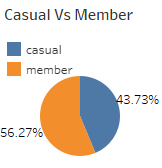

Casual users took the total trips of count 1.98 millions with the percentage of 43.4% whereas members recorded total trips of count 2.62 millions with the percentage of 56.57%.

**Total Trips on each type of bike**


Cyclistic has a 3 different types of bicycles. They can be categorized as classic, docked, and electric. The bar chart below shows the total number of trips each user took on the three different types of bicycles.
Statistics shows that casual users took total % rides on classic bikes, % on docked bikes and % on electric bikes whereas members took total % rides on classic and % on electric bikes.

In [20]:
biketypes=pd.pivot_table(df, values ='ride_id', index ='member_casual',
                         columns =['rideable_type'], aggfunc = 'count', fill_value=0)
biketypes

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1199965,250439,533770
member,1938964,0,689238


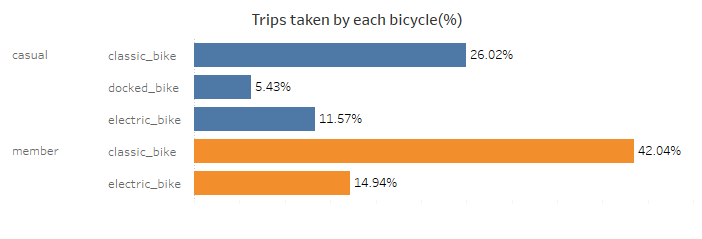

**Trips taken in Week**

In [21]:
rides_per_week=pd.pivot_table(df, values ='ride_id', index ='weekday',
                         columns =['member_casual'], aggfunc = 'count').sort_values(by=['weekday'])
rides_per_week

member_casual,casual,member
weekday,,
Sunday,233055,370975
Monday,207517,411816
Tuesday,213729,410411
Wednesday,245569,414315
Thursday,277541,364767
Friday,432138,345780
Saturday,374625,310138


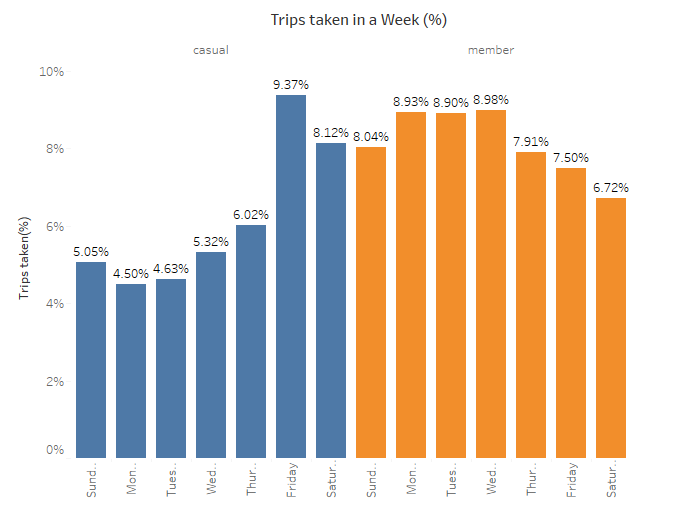

**Trips taken in Day**

In [22]:
rides_per_hour=pd.pivot_table(df, values ='ride_id', index ='Hour',
                         columns =['member_casual'], aggfunc = 'count').sort_values(by=['Hour'])
rides_per_hour

member_casual,casual,member
Hour,,
0,38896,25705
1,27259,16386
2,17545,9172
3,9382,5376
4,6152,6376
5,9194,27622
6,20830,76081
7,39164,143240
8,53034,167320


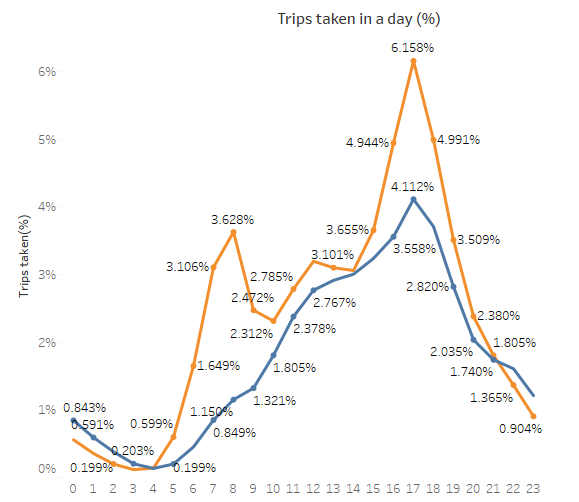

**Trips taken in Year**

In [23]:
rides_per_month=pd.pivot_table(df, values ='ride_id', index ='Month',
                         columns =['member_casual'], aggfunc = 'count').sort_values(by=['Month'])
rides_per_month

member_casual,casual,member
Month,,
Jan,12481,66575
Feb,14973,72683
Mar,66409,146497
Apr,90816,177723
May,216938,277162
June,287553,322256
July,365513,317690
Aug,338138,327946
Sep,290078,323287


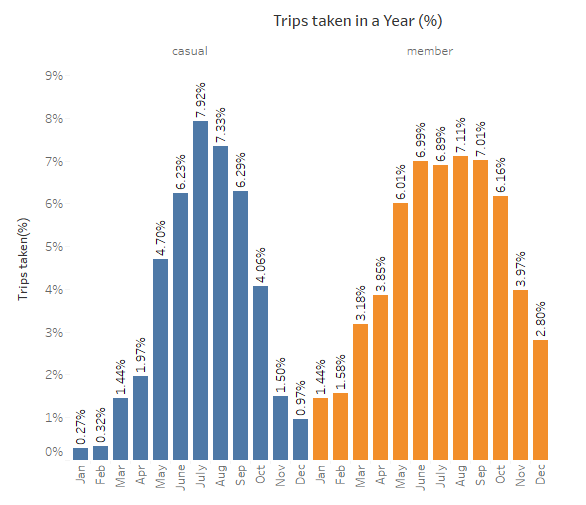

**Trips duration of each user type**

In [24]:
rides_per_ridelen = df.groupby("member_casual")["ride_len"].mean()
rides_per_ridelen

member_casual
casual    27.914139
member    12.344352
Name: ride_len, dtype: float64

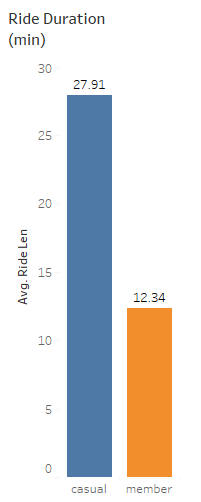

**Trips duration in Week**

In [25]:
rides_per_ridelen=pd.pivot_table(df, values ='ride_len', index ='weekday',
                         columns =['member_casual'],aggfunc = 'mean').sort_values(by=['weekday'])
rides_per_ridelen

member_casual,casual,member
weekday,,
Sunday,29.215198,11.958194
Monday,23.961025,11.466818
Tuesday,23.812150,11.622266
Wednesday,24.999707,11.796261
Thursday,26.133721,12.049207
Friday,30.433234,13.996975
Saturday,31.958369,14.163821


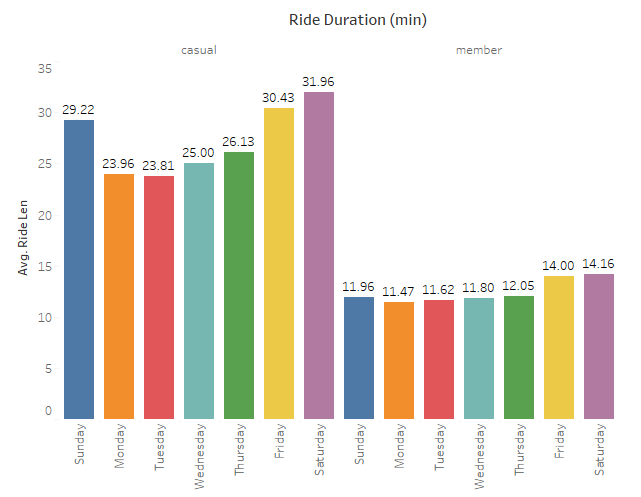

**Trips duration in Year**

In [26]:
rides_per_ridelen=pd.pivot_table(df, values ='ride_len', index ='Month',
                         columns =['member_casual'],aggfunc = 'mean').sort_values(by=['Month'])
rides_per_ridelen

member_casual,casual,member
Month,,
Jan,27.131560,9.917807
Feb,24.608896,10.344689
Mar,28.261169,11.485559
Apr,25.759899,11.303472
May,27.629867,13.049054
June,24.913992,13.440656
July,33.143634,13.519651
Aug,28.350650,13.261491
Sep,27.868973,12.833021


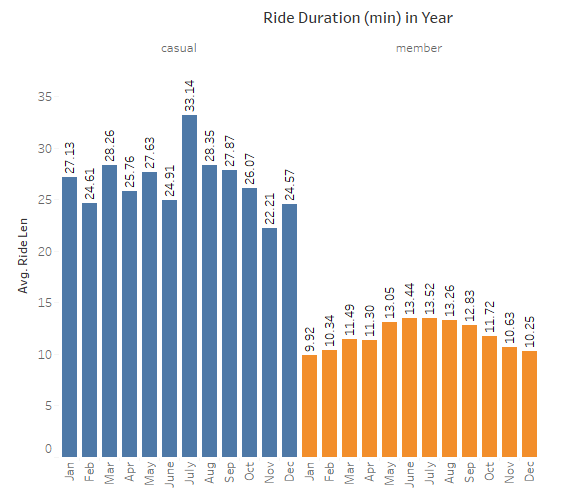

5. **Visualize the data**

Data visualization is the graphical representation of data. Dashboards are a collection of different views or visualization that showcase correlation in a complete holistic view and helps data storytelling to make better data driven decisions.

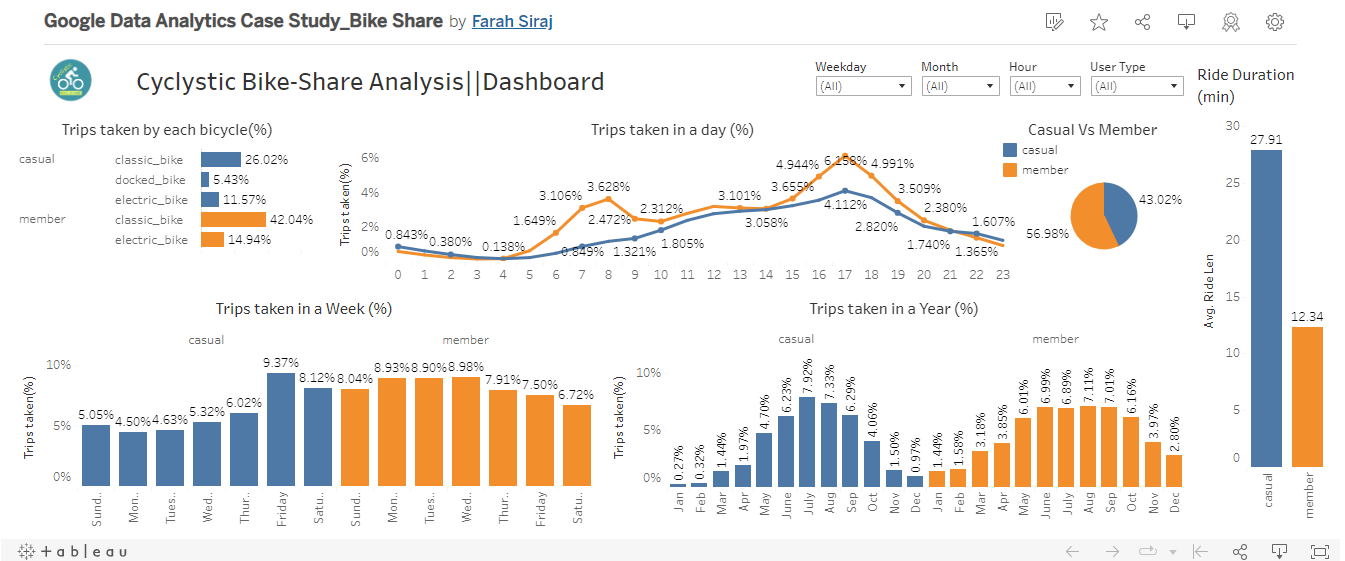

A snippet of the interactive dashboard made on Tableau | Available on my [Tableau profile](https://public.tableau.com/app/profile/farah.siraj/viz/GoogleDataAnalyticsCaseStudy_BikeShare/Dashboard2)

**Observations**

By observing the behavior and usage of Cyclistic services, we have following observations

* Weightage of members usage is more than casual users
* Trip duration of casual is more than members on each day, it shows that casual users use bikes for lesiure/exercise and fun while members use for work
* Casual user utilization start from 8 AM and takes peak at 5 PM  then goes in decreasing trend but still high at 11 PM that shows casual use bikes weather starts and become pleasant while members peak observed at 7 AM and 5 PM and rising trend between the intervals thats shows member use them for work commute.
* Casual users usage is more over weekend while members use more in weekdays 
* Both users take more trips during summer and spring seasons from May to oct when weather is pleasant while usage seems low in winter seasons.

6. **Act - Solving the problem**
**Recommendations**

Moreno, the director, has assigned the task to the team to design the effective marketing strategy to increase members to gain in profit for the company. The team aimed to work on converting casual users to subscribe to membership.

Based on observation derived from the data, following recommendation are proposed to fulfill the objective.

* Make a plan to provide promotions to members during weekend trips.
* Provide members priority access and discounted prices on rides on busy hours and non       busy hours.
* Make membership cost much cheaper than the cost of 12 month service usage of casual       users.
* Provide bonus, free rides, lucky draws for members on certain number of trips.
* Provide bonus, free rides, lucky draws for members above certain duration of ride taken.
* Provide promotions for members during summer months from May to oct to encorage casual     users to get membership.
* Conduct the survey to get information from casual users regarding what features or         benefit they see while considering to subscribe to membership.

